In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('eda_data.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'salary', 'min_salray', 'max_salary', 'average_salary',
       'Company_txt', 'State', 'age', 'Python', 'R Studio', 'spark', 'aws',
       'excel', 'Job_role', 'Seniority', 'desc_len', 'num_competetior'],
      dtype='object')

In [15]:
df_mdl_columns=df[['average_salary','Rating','Size','Type of ownership','Industry','Sector','Revenue','num_competetior','hour',
             'State','age','Python','spark','aws','excel','Job_role','Seniority','desc_len']]

In [16]:
df_dum=pd.get_dummies(df_mdl_columns)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X=df_dum.drop('average_salary',axis=1)

In [20]:
Y=df_dum['average_salary']

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [25]:
mdl=LinearRegression()
mdl.fit(X_train,Y_train)

LinearRegression()

In [27]:
np.mean(cross_val_score(mdl,X_train,Y_train,scoring="neg_mean_absolute_error",cv=3))

-20.621589122008956

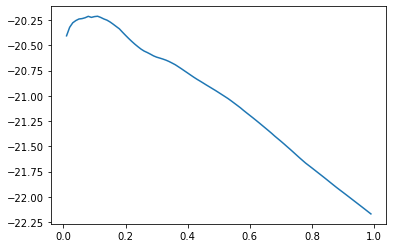

In [29]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,Y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [30]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
10,0.11,-20.212731


In [31]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,Y_train,scoring="neg_mean_absolute_error",cv=3))

-15.735849698337008

In [32]:
from sklearn.model_selection import GridSearchCV
params={'n_estimators':range(10,300,10),'criterion':('mse','mae'),'max_features':('auto','sqrt','log2')}

In [35]:
gs=GridSearchCV(rf,params,scoring="neg_mean_absolute_error",cv=3)

In [ ]:
gs.fit(X_train,Y_train)

In [ ]:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])